In [2]:
!pip install -U "tensorflow-gpu==2.0b1"

     |████████████████████████████████| 348.9MB 67kB/s 
     |████████████████████████████████| 501kB 45.7MB/s 
     |████████████████████████████████| 3.1MB 42.1MB/s 


Import the necessary paackages required for the project implementation

In [0]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

from google.colab import files

%matplotlib inline

In [0]:
# Generate some sample dataset to train the regression model
x = [-1, 0, 1, 2, 3, 4]
y = [-3, -1, 1, 3, 5, 7]

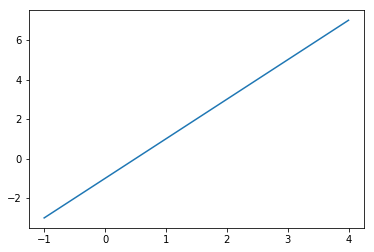

In [20]:
# Visualize the plot of the data
plt.plot(x, y)

In [0]:
# Create a sequential model with one layer to perform the training
model = models.Sequential([
    Dense(units=1, input_shape = [1])
])

In [0]:
# Compile the model using SGD optimizer and MSE loss function 
model.compile(optimizer="sgd", loss="mse")

In [28]:
model.fit(x, y, epochs=300)

Train on 6 samples
Epoch 1/300
6/6 [==============================] - 0s 674us/sample - loss: 0.0286
Epoch 2/300
6/6 [==============================] - 0s 479us/sample - loss: 0.0280
Epoch 3/300
6/6 [==============================] - 0s 720us/sample - loss: 0.0274
Epoch 4/300
6/6 [==============================] - 0s 352us/sample - loss: 0.0268
Epoch 5/300
6/6 [==============================] - 0s 267us/sample - loss: 0.0263
Epoch 6/300
6/6 [==============================] - 0s 757us/sample - loss: 0.0257
Epoch 7/300
6/6 [==============================] - 0s 369us/sample - loss: 0.0252
Epoch 8/300
6/6 [==============================] - 0s 375us/sample - loss: 0.0247
Epoch 9/300
6/6 [==============================] - 0s 460us/sample - loss: 0.0242
Epoch 10/300
6/6 [==============================] - 0s 371us/sample - loss: 0.0237
Epoch 11/300
6/6 [==============================] - 0s 309us/sample - loss: 0.0232
Epoch 12/300
6/6 [==============================] - 0s 665us/sample - loss: 0

In [29]:
# Save the model
save_dir = 'saved_models/1'
tf.saved_model.save(model, save_dir)

INFO:tensorflow:Assets written to: saved_models/1/assets


In [31]:
# Convert the model to TFLite
converter = tf.lite.TFLiteConverter.from_saved_model(save_dir)

# Make the conversion and name it tflite
tflite_model = converter.convert()

INFO:tensorflow:Converted 2 variables to const ops.


In [37]:
# Save the converted version for use in a mobile device
import pathlib
tflite_model_file = pathlib.Path('/content/model.tflite')

# Write the lite model to the tflite model file
tflite_model_file.write_bytes(tflite_model)

692

In [0]:
# Make tests for the creared model
# If it is perfect, then one can go a head to implement this on mobile device

# Initialize the lite interpreter
# By loading the model and allocating tensors to it
interpreter = tf.lite.Interpreter(model_content=tflite_model)
interpreter.allocate_tensors()

In [0]:
# Get the input and output tensors from the loaded model
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [0]:
# Test the model on some random inputs
# Generate the inputs based on the training data shape
input_shape = input_details[0]['shape']

# Initialize where t keep the inputs and outputd from the predictions
inputs, outputs = [], []

# Generate 100 random sample points
for _ in range(100):
  
  # Get some input data
  input_data = np.array(np.random.random_sample(input_shape), dtype=np.float32)
  
  interpreter.set_tensor(input_details[0]['index'], input_data)
  
  # Run the interpreter
  interpreter.invoke()
  
  # Get the output resulting from the invokation
  tflite_results = interpreter.get_tensor(output_details[0]['index'])
  
  
  # Test the model on the random data
  tf_results = model(tf.constant(input_data))
  output_data = np.array(tf_results)
  
  inputs.append(input_data[0][0])
  outputs.append(output_data[0][0])

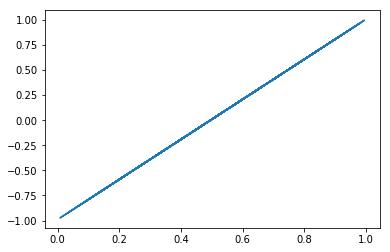

In [44]:
plt.plot(inputs, outputs)

In [0]:
# Downlaod the finally tested model for deployment on the mobiel device

files.download(tflite_model_file)